# Tree-Based Models (Bagging, Boosting and Random Forest)

Tree models also called Classification and Regression Trees (CART) are classification and regression method. We will tackle about different Tree-Based Models Bagging, Boosting and Random forest with the help of the Video Games Sales dataset, we will show you how we are going to apply all these methods in order to contruct more powerful predictive models for regression or classification. In this post we will apply these ensemble techniques on Regression problem. The idea of these techniques combine the decisions from multiple models to improve the overall performance as they minimize factors of noise, bias and variances to improve the stability and accuracy of any models. 



# 1️⃣ Bagging 

Bagging also called Bootstrap aggregating which can be used with any type of methods mostly decision tree methods as this method suffers from high variance. Bagging is a general-purpose procedure for reducing the variance of a statistical learning method and helps to avoid overfitting. It is achieved by creating random samples of the training dataset with replacement and building model for each sample. The result of these multiple models are combined using average or multiple voting. It is given by,

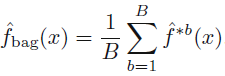

where B is the different boostrapped training dataset and  f∗b(x) is the trained method of the Bth bootrapped training set and the average of all the predictions is what we called Bagging. 

To apply Bagging to predict a continuous outcome Y in the regression context, which is mostly useful in decision tree,  the B regression trees has to be constructed using B bootstrapped training set and average the resulting prediction. 

To apply Bagging to predict a qualitative outcome Y in the classification context, the class that is predicted by each of the B trees  for a given test observation has to be recorded. The most commonly occuring majority class among the B predictions is the overall prediction. 




# 2️⃣ Boosting 

Boosting is also an ensemble technique and it refers to a group of algorithms that utilize weighted averages to make weak learners into stronger learners. Unlike bagging that had each model run independently and then aggregate the outputs at the end without preference to any model. Boosting is all about “teamwork”. Each model that runs, dictates what features the next model will focus on. Boosting takes this concept much further and fits a series of models with each successive model fit to minimize the error of the previous models. Boosting is a sequential technique in which, the first algorithm is trained on the entire data set and the subsequent algorithms are built by fitting the residuals of the first algorithm, thus giving higher weight to those observations that were poorly predicted by the previous model. It has shown to provide better predictive accuracy than Bagging. It is given by, 

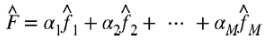

where M is the maximum number of model to be fit, f is a trained model and alpha is log 1 minus weighted error devided by the weighted error. 


# 3️⃣ Random Forest

Random forests or random decision forests is also an ensemble learning method for classification, regression and other algorithm methods. The forest it builds is an ensemble of decisions trees. It basically constructs a multitude of decision trees at training time and merge them together to get more accurate and stable prediction of the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. making the average of the resulting trees less variable and hence more reliable. Random forests provide an improvement over bagged trees by way of a
random small tweak that decorrelates the trees. Random Forest in given by,

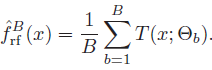

For regression, T(x;£b) is the grown trees and B is the different boostrapped training dataset. 

If for regression T(x;£b)is the grown trees, in classification Cb(x) is the class prediction of the Bth random forest


# Comparison of these Tree-Based Models

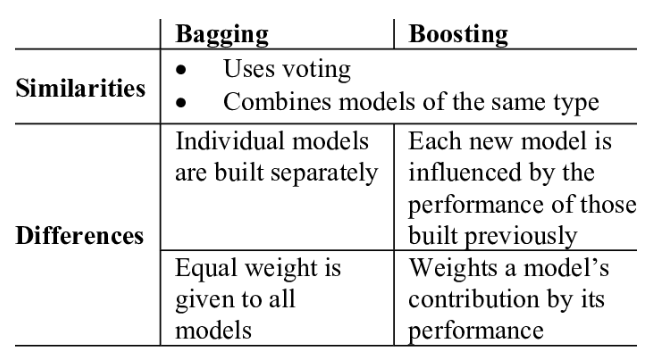

# 4️⃣ Tree-Based Models Application - Video Games Sales Dataset


In [1]:
#Loading libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [4]:
#Loading dataset
vgsales_data = pd.read_csv('../vgsales.csv')

In [5]:
vgsales_data.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [6]:
vgsales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
vgsales_data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
#Just drop missing values because they are only few
vgsales_data = vgsales_data.dropna()

In [9]:
vgsales_data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


No handles with labels found to put in legend.


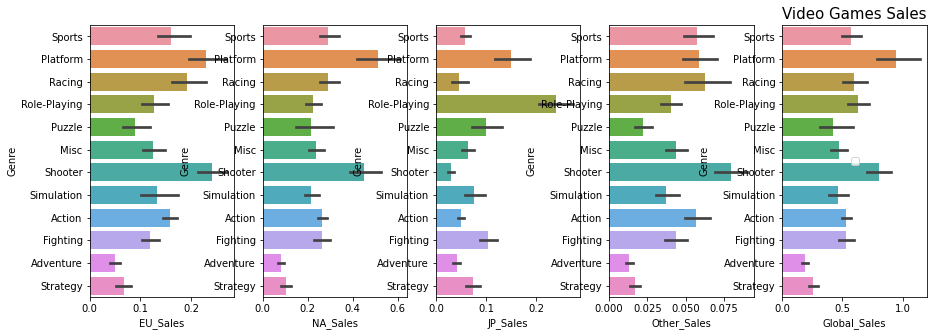

In [10]:
fig, ax=plt.subplots(1,5)
fig.set_size_inches(15, 5)
sns.barplot(x="EU_Sales", y="Genre", data=vgsales_data, ax=ax[0])
sns.barplot(x="NA_Sales", y="Genre", data=vgsales_data, ax=ax[1])
sns.barplot(x="JP_Sales", y="Genre", data=vgsales_data, ax=ax[2])
sns.barplot(x="Other_Sales", y="Genre", data=vgsales_data, ax=ax[3])
sns.barplot(x="Global_Sales", y="Genre", data=vgsales_data, ax=ax[4])
plt.title('Video Games Sales', fontsize=15)
plt.legend(loc="center")
plt.show()

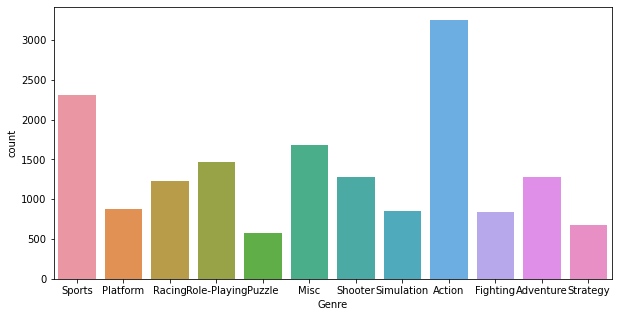

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x="Genre", data=vgsales_data)
plt.show()

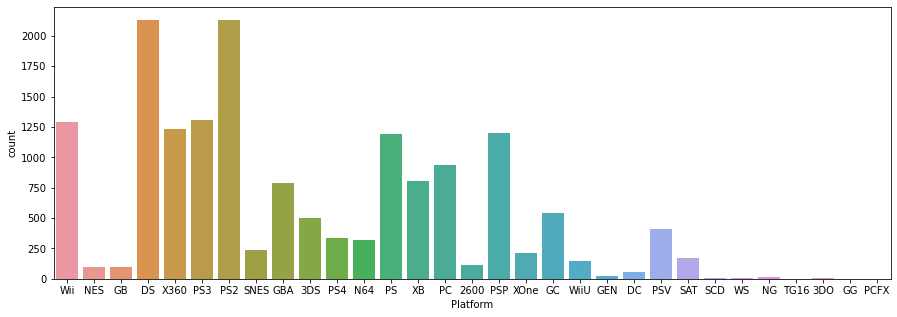

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(x="Platform", data=vgsales_data)
plt.show()

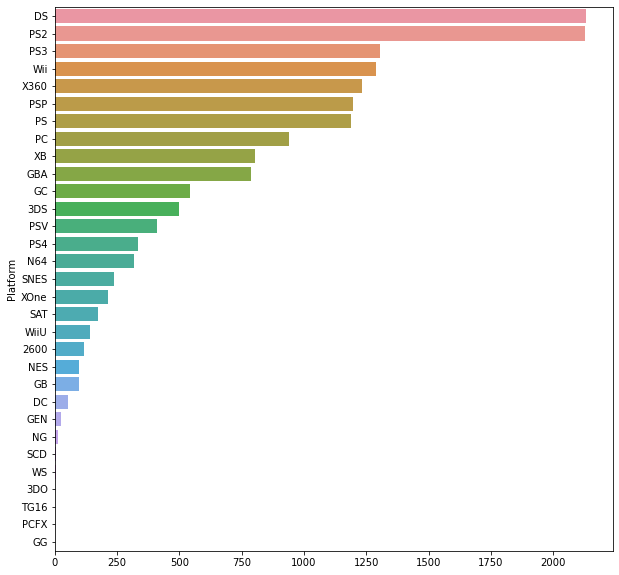

In [13]:
Genre = pd.crosstab(vgsales_data.Platform,vgsales_data.Genre)
GenreTotal = Genre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(10,10))
sns.barplot(x=GenreTotal.values,y=GenreTotal.index)
plt.show()

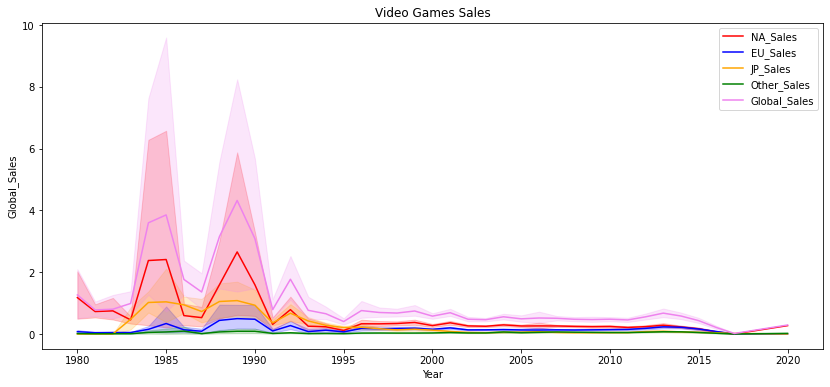

In [14]:
plt.subplots(figsize=(14,6))
sns.lineplot(x="Year", y="NA_Sales", label="NA_Sales", color="red", data=vgsales_data)
sns.lineplot(x="Year", y="EU_Sales", label="EU_Sales",color="blue", data=vgsales_data)
sns.lineplot(x="Year", y="JP_Sales", label="JP_Sales",color="orange", data=vgsales_data)
sns.lineplot(x="Year", y="Other_Sales", label="Other_Sales",color="green", data=vgsales_data)
sns.lineplot(x="Year", y="Global_Sales",label="Global_Sales",color="violet", data=vgsales_data)
plt.title("Video Games Sales")
plt.show()

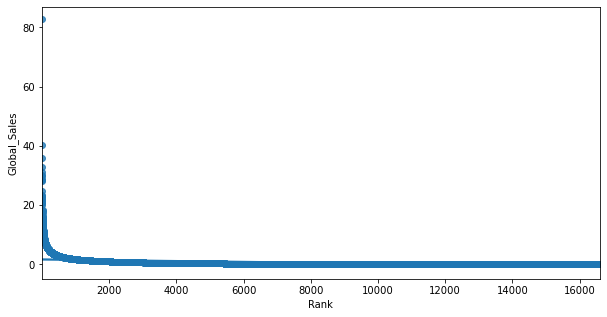

In [15]:
plt.figure(figsize=(10,5))
sns.regplot(x='Rank',y='Global_Sales',data=vgsales_data)
plt.show()

In [20]:
# Defining Train Test Split
X = vgsales_data.drop(["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"], axis = 1)
y = vgsales_data[["Global_Sales" ]] #"NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
#Separating numeric and nonnumeric features
num_features = list(X.select_dtypes(include=["number"]).columns)
non_num_features = list(X.select_dtypes(exclude=["number"]).columns)

In [22]:
class FeatureSelector:

    
    def __init__(self, features=[]):
        
        if type(features) != list:
            raise ValueError("Input features must be of type List.")
        
        self.c = features

    def fit(self, X, y=None):

        return self

    def transform(self, X):

        return X[self.c]

In [25]:
#Define Pipelines

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion

X_pipeline = Pipeline([
    ("union", FeatureUnion([
        ("numeric", Pipeline([
            ("select features", FeatureSelector(features=num_features)),
            ("scaler", MinMaxScaler())
        ])),
        ("non num features", Pipeline([
            ("select features", FeatureSelector(features=non_num_features)),
            ("encode data", OneHotEncoder())
        ]))
    ]))
])



X_pipeline.fit(X_train)
X_train_processed = X_pipeline.transform(X_train)
X_pipeline.fit(X_test)
X_test_processed = X_pipeline.transform(X_test)

In [26]:
#Y-Pipeline
y_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

y_pipeline.fit(y_train)
y_train_processed = y_pipeline.transform(y_train)
y_pipeline.fit(y_test)
y_test_processed = y_pipeline.transform(y_test)

# Modelling

In [27]:
# Import ML algorithms for model comparison of Random Forest Regressor and other models
from sklearn.linear_model import LinearRegression, Lasso, Ridge,  ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics as metrics

In [28]:
#Decision Tree Regression
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train_processed, y_train_processed)
dec_tree_predict = dec_tree.predict(X_test_processed)

#model evaluation
tree_r2 = r2_score( y_test_processed, dec_tree_predict)
tree_mse = mean_squared_error(y_test_processed, dec_tree_predict)

print("tree_r2: ", tree_r2)
print("tree_mse: ", tree_mse)

ValueError: Number of features of the model must match the input. Model n_features is 10113 and input n_features is 3314 

In [440]:
#BaggingRegressor
y_train_processed = y_train_processed.ravel()
bagging_model = BaggingRegressor()
bagging_model.fit(X_train_processed, y_train_processed)
bagging_predict = bagging_model.predict(X_test_processed)

#Model Evaluation
bagging_r2 = r2_score( y_test_processed, bagging_predict)
bagging_mse = mean_squared_error(y_test_processed, bagging_predict)

print("bagging_r2: ", bagging_r2)
print("bagging_mse: ", bagging_mse)

bagging_r2:  0.858403989776045
bagging_mse:  0.0003742729648284727


In [441]:
#BoostingRegressor
boosting_model = GradientBoostingRegressor()
boosting_model.fit(X_train_processed, y_train_processed)
boosting_predict = boosting_model.predict(X_test_processed)


#Model Evaluation
boosting_r2 = r2_score( y_test_processed, boosting_predict)
boosting_mse = mean_squared_error(y_test_processed, boosting_predict)

print("boosting_r2: ", boosting_r2)
print("boosting_mse: ", boosting_mse)

boosting_r2:  0.868388775798687
boosting_mse:  0.00034788072777347767


In [442]:
#RandomForestRegressor Modelling
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train_processed, y_train_processed)
rfr_predict = rfr_model.predict(X_test_processed)

#Model Evaluationelasticnet_predict
forest_r2 = r2_score(y_test_processed, rfr_predict )
forest_mse = mean_squared_error(y_test_processed, rfr_predict )

print("forest_r2: ", forest_r2)
print("forest_mse: ", forest_mse)

forest_r2:  0.8430023768362577
forest_mse:  0.00041498320326667097


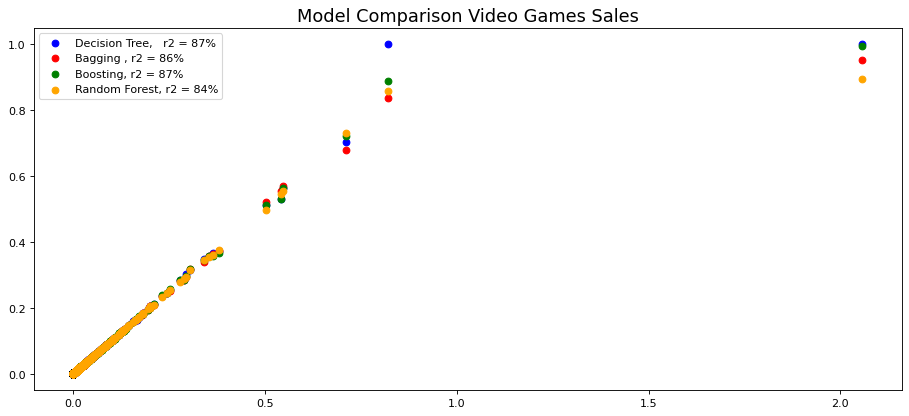

In [445]:
#Model Comparsion
fig, ax = plt.subplots(figsize=(14,6), dpi=80)
ax.scatter(y_test_processed, dec_tree_predict , label = "Decision Tree,   r2 = 87%", color="blue")
ax.scatter(y_test_processed, bagging_predict , label = "Bagging , r2 = 86%", color="red")
ax.scatter(y_test_processed, boosting_predict , label = "Boosting, r2 = 87%", color="green")
ax.scatter(y_test_processed, rfr_predict , label = "Random Forest, r2 = 84%", color="orange")
plt.legend(loc='upper left')
ax.set_title('Model Comparison Video Games Sales', fontsize=16)
plt.show() 

In [24]:
#Linear Modelling

lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train_processed)
lr_predict = lr_model.predict(X_test_processed)


#Model Evaluation
r2 = r2_score( y_test_processed, lr_predict)
mse = mean_squared_error(y_test_processed, lr_predict)

print(r2)
print(mse)

0.10545274693838773
0.00150996300125913


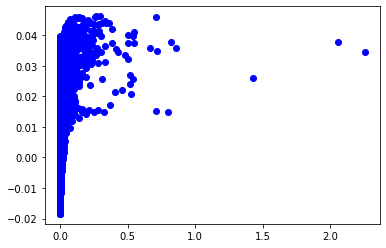

In [80]:
#Linear Graph
plt.scatter(y_test_processed, lr_predict , label = "´Linear ", color="blue")
plt.show()

In [25]:
#Lasso Modelling
lasso_model = Lasso()
lasso_model = lasso_model.fit(X_train_processed, y_train_processed)
lasso_predict = lasso_model.predict(X_test_processed)

#Model Evaluation
r2 = r2_score(y_test_processed, lasso_predict)
mse = mean_squared_error(y_test_processed, lasso_predict)

print(r2)
print(mse)


-0.00039206998718013255
0.001691822783354864


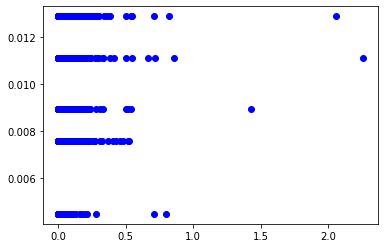

In [81]:
#Linear Graph
plt.scatter(y_test_processed, lasso_predict  , label = "Lasso ", color="blue")
plt.show()

In [26]:
#ElasticNet Modelling
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train_processed, y_train_processed)
elasticnet_predict = elasticnet_model.predict(X_test_processed)

#Model Evaluationelasticnet_predict
r2 = r2_score(y_test_processed, elasticnet_predict)
mse = mean_squared_error(y_test_processed, elasticnet_predict)

print(r2)
print(mse)

-0.00039206998718013255
0.001691822783354864


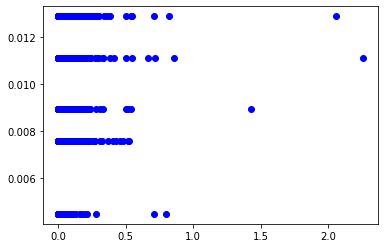

In [84]:
#Graph Elastic Net
plt.scatter(y_test_processed,  elasticnet_predict , label = "ElasticNet", color="blue")
plt.show()

In [28]:
#KNN Modelling
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_processed, y_train_processed)
knn_predict = knn_model.predict(X_test_processed)

#Model Evaluationelasticnet_predict
r2 = r2_score(y_test_processed, knn_predict )
mse = mean_squared_error(y_test_processed, knn_predict )

print(r2)
print(mse)

0.33566464459318696
0.0010967563804280983


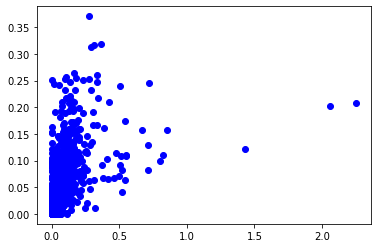

In [88]:
plt.scatter(y_test_processed,  knn_predict, label = "KNN", color="blue")
plt.show()

In [ ]:
fig, ax=plt.subplots(1,5)
fig.set_size_inches(15, 5)
sns.barplot(x="EU_Sales", y="Name", data=vgsales_data, ax=ax[0])
sns.barplot(x="NA_Sales", y="Name", data=vgsales_data, ax=ax[1])
sns.barplot(x="JP_Sales", y="Name", data=vgsales_data, ax=ax[2])
sns.barplot(x="Other_Sales", y="Name", data=vgsales_data, ax=ax[3])
sns.barplot(x="Global_Sales", y="Name", data=vgsales_data, ax=ax[4])
ax.set_title('Products', fontsize=15)
plt.legend(loc="center")
plt.show()

In [ ]:
fig, ax=plt.subplots(1,5)
fig.set_size_inches(15, 5)
sns.barplot(x="EU_Sales", y="Platform", data=vgsales_data, ax=ax[0])
sns.barplot(x="NA_Sales", y="Platform", data=vgsales_data, ax=ax[1])
sns.barplot(x="JP_Sales", y="Platform", data=vgsales_data, ax=ax[2])
sns.barplot(x="Other_Sales", y="Platform", data=vgsales_data, ax=ax[3])
sns.barplot(x="Global_Sales", y="Platform", data=vgsales_data, ax=ax[4])
ax.set_title('"Platform"', fontsize=15)
plt.legend(loc="center")
plt.show()


In [ ]:
fig, ax=plt.subplots(1,5)
fig.set_size_inches(15, 5)
sns.barplot(x="EU_Sales", y="Publisher", data=vgsales_data, ax=ax[0])
sns.barplot(x="NA_Sales", y="Publisher", data=vgsales_data, ax=ax[1])
sns.barplot(x="JP_Sales", y="Publisher", data=vgsales_data, ax=ax[2])
sns.barplot(x="Other_Sales", y="Publisher", data=vgsales_data, ax=ax[3])
sns.barplot(x="Global_Sales", y="Publisher", data=vgsales_data, ax=ax[4])
ax.set_title('"Platform"', fontsize=15)
plt.legend(loc="center")
plt.show()


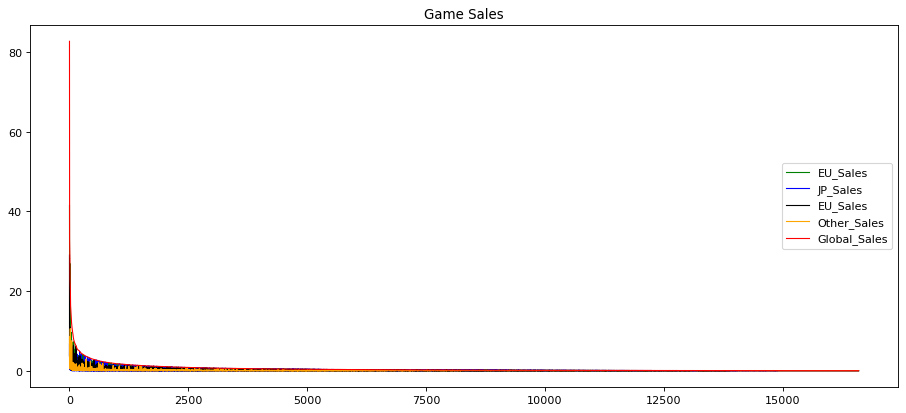

In [56]:
fig, ax=plt.subplots(figsize=(14,6), dpi=80)
ax.plot(vgsales_data["NA_Sales"], label="EU_Sales", color="green", animated=True, linewidth=1)
ax.plot(vgsales_data["JP_Sales"], label="JP_Sales", color="blue", animated=True, linewidth=1)
ax.plot(vgsales_data["EU_Sales"], label="EU_Sales", color="black", animated=True, linewidth=1)
ax.plot(vgsales_data["Other_Sales"], label="Other_Sales", color="orange", animated=True, linewidth=1)
ax.plot(vgsales_data["Global_Sales"], label="Global_Sales", color="red", animated=True, linewidth=1)
plt.legend(loc="center right")
ax.set_title("Game Sales")
plt.show()

In [129]:
vgsales_data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [151]:
name = pd.get_dummies(vgsales_data["Name"], drop_first=True)
platform = pd.get_dummies(vgsales_data["Platform"], drop_first=True)
genre = pd.get_dummies(vgsales_data["Genre"], drop_first=True)
publisher = pd.get_dummies(vgsales_data["Publisher"], drop_first=True)

vgsales_data = pd.concat([vgsales_data, platform,  genre, publisher], axis=1)
vgsales_cleandata = vgsales_data.drop(columns=["Name","Platform","Genre", "Publisher" ])
vgsales_cleandata.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,3DO,3DS,DC,...,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train Test Split

In [162]:
X = vgsales_cleandata[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = vgsales_cleandata["Global_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Bagging Ensembles

In [167]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionRegressor

seed = 42
num_trees = 100
cart = DecisionTreeRegressor(random_state=42)
bagging_clf = BaggingRegressor(base_estimator=cart, n_estimators=num_trees, random_state=seed)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)


ImportError: cannot import name 'DecisionRegressor' from 'sklearn.tree' (c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\__init__.py)

In [ ]:
#fig, ax=plt.subplots(figsize=(14,6), dpi=80)
#ax.plot(vgsales_data["NA_Sales"], label="EU_Sales", color="green", animated=True, linewidth=1)
#ax.plot(vgsales_data["JP_Sales"], label="JP_Sales", color="blue", animated=True, linewidth=1)
#ax.plot(vgsales_data["EU_Sales"], label="EU_Sales", color="black", animated=True, linewidth=1)
#ax.plot(vgsales_data["Other_Sales"], label="Other_Sales", color="red", animated=True, linewidth=1)
#ax.plot(vgsales_data["Global_Sales"], label="Global_Sales", color="orange", animated=True, linewidth=1)
#plt.legend(loc="upper left")
#ax.set_title("Game Sales")
#plt.show()